In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def inverse_kinematics_right(x, y):
    r = math.sqrt((x**2) + (y**2))
    
    theta = math.atan(y/x)
    if x < 0:
        theta = theta + math.pi
        
    gamma = math.acos(((90**2)+(r*r)-(160*160))/(2*90*r))
    thetaInDegree = math.degrees(theta)
    gammaInDegree = math.degrees(gamma)
    alpha = theta + gamma
    x1 = 90*math.cos(alpha)
    y1 = 90*math.sin(alpha)
    
    return x1, y1

def inverse_kinematics_left(x, y):
    r = math.sqrt((x**2) + (y**2))
    theta = math.atan(y/x)
    if x < 0:
        theta = theta + math.pi
    gamma = math.acos(((90**2)+(r*r)-(160*160))/(2*90*r))
    thetaInDegree = math.degrees(theta)
    gammaInDegree = math.degrees(gamma)
    alpha = theta - gamma
    x1 = 90*math.cos(alpha)
    y1 = 90*math.sin(alpha)
    
    return x1, y1

<IPython.core.display.Javascript object>


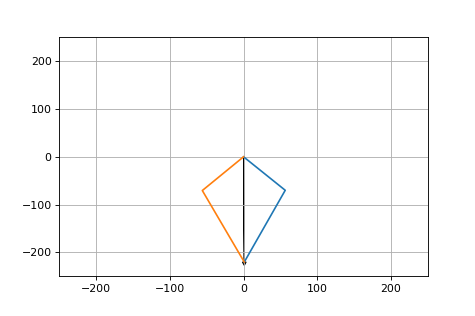

In [3]:
x, y = 1, -220
x1, y1 = inverse_kinematics_right(x, y)
x2, y2 = inverse_kinematics_left(x, y)
%matplotlib notebook
fig = plt.figure(0)
plt.grid()
plt.ylim([-250, 250])
plt.xlim([-250, 250])
plt.plot([0, x1, x], [0, y1, y])
plt.plot([0, x2, x], [0, y2, y])
plt.arrow(0, 0, x, y, head_width=5.0, head_length=7.0, fc='lightblue', ec='black')

<IPython.core.display.Javascript object>


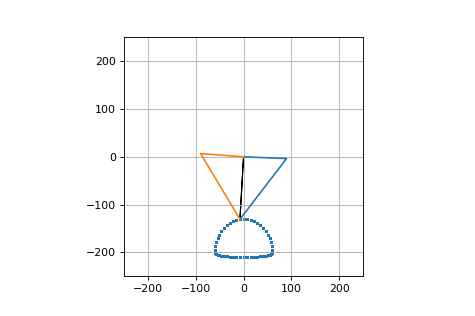

In [18]:
import numpy as np
from matplotlib import animation
height = 200
lenght = 120
amp1 = 70
amp2 = 10
f1 = 0.2

def plotLeg(x, y):  
    fig = plt.figure(15)
    #ax = fig.add_subplot(111)
    #ax.set_aspect('equal')
    x1, y1 = inverse_kinematics_right(x, y)
    x2, y2 = inverse_kinematics_left(x, y)
    plt.grid()
    plt.ylim([-250, 250])
    plt.xlim([-250, 250])
    plt.plot([0, x1, x], [0, y1, y])
    plt.plot([0, x2, x], [0, y2, y])
    #time.sleep(1)
    #plt.cla()

def stepForward(time, height, amp, lenght, f):
    x = lenght/2*np.sin(2*math.pi*f*time)
    y = -height + amp*np.cos(2*math.pi*f*time)
    return x,y

def stepBackward(time, height, amp, lenght, f):
    x = lenght/2*np.sin(2*math.pi*f*time)
    y = -height + amp*np.cos(2*math.pi*f*time)   
    return x,y


lst_x = []
lst_y = []
for t in np.arange(0,1000,0.1):
    x, y = stepForward(t, height, amp1, lenght, f1)
    
    if y + height < 0:
        x, y = stepBackward(t, height, amp2, lenght, f1)
    lst_x.append(x)
    lst_y.append(y)

i = 0
def animate(i):
    x = lst_x[i]
    y = lst_y[i]
       
    x1, y1 = inverse_kinematics_right(x, y)
    x2, y2 = inverse_kinematics_left(x, y)
    ax1.clear()
    plt.ylim([-250, 250])
    plt.xlim([-250, 250])
    plt.grid()
    ax1.plot([0, x1, x], [0, y1, y])
    ax1.plot([0, x2, x], [0, y2, y])
    ax1.scatter(lst_x[0:i], lst_y[0:i], s=1)
    plt.arrow(0, 0, x, y, head_width=2, head_length=1.0, fc='lightblue', ec='black')
    i += 1
    

fig = plt.figure()


ax1 = fig.add_subplot(1,1,1)
ax1.set_aspect('equal')

ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()
    

    